In [1]:
import pandas as pd

colunas = ['PROCESSO', 'EMENTA', 'ROTULO_MANUAL']

ementas_df = pd.read_csv('../data/ementas_rotulos_manual.csv', header=0, sep=',', quotechar='"', usecols=colunas)

ementas_df.shape

(14579, 3)

In [2]:
%run '../app/leis.py'

leis = []

extrator = Leis()

for index, row in ementas_df.iterrows():
    for lei in extrator.get_leis(row['EMENTA']):
        leis.append([row['PROCESSO'], lei])

"{} leis".format(len(leis))

'26527 leis'

In [3]:
leis_df = pd.DataFrame(data=leis, columns = ['PROCESSO', 'LEI'])

df = pd.merge(ementas_df, leis_df, on=['PROCESSO'])

df.head()

,PROCESSO,EMENTA,ROTULO_MANUAL,LEI
0,00039604720138240039,<br> EMBARGOS DE DECLARAÇÃO. PRETENDIDA REDI...,CDC,artigo 535
1,00039604720138240039,<br> EMBARGOS DE DECLARAÇÃO. PRETENDIDA REDI...,CDC,9656/1998
2,00039604720138240039,<br> EMBARGOS DE DECLARAÇÃO. PRETENDIDA REDI...,CDC,616/2012
3,00039604720138240039,<br> APELAÇÃO CÍVEL. AÇÃO DECLARATÓRIA C/C R...,CDC,artigo 535
4,00039604720138240039,<br> APELAÇÃO CÍVEL. AÇÃO DECLARATÓRIA C/C R...,CDC,9656/1998


Foram encontrados 946 leis únicas

In [4]:
df.describe()

,PROCESSO,EMENTA,ROTULO_MANUAL,LEI
count,76469,76469,76469,76469
unique,6349,8639,29,946
top,40094280220178240000,<br> OMISSÃO NÃO VERIFICADA. INEXISTÊNCIA DO...,EXP,artigo 1022
freq,1188,2808,28742,16428


In [5]:
groupby = df.groupby('LEI')

groupby[['LEI']].count().head()

,LEI
LEI,
1/1975,9
1/2012,3
1/2014,1
100/2015,2
101/2010,4


In [6]:
c = groupby.filter(lambda x: len(x) > 100)

c.head()

,PROCESSO,EMENTA,ROTULO_MANUAL,LEI
0,00039604720138240039,<br> EMBARGOS DE DECLARAÇÃO. PRETENDIDA REDI...,CDC,artigo 535
1,00039604720138240039,<br> EMBARGOS DE DECLARAÇÃO. PRETENDIDA REDI...,CDC,9656/1998
3,00039604720138240039,<br> APELAÇÃO CÍVEL. AÇÃO DECLARATÓRIA C/C R...,CDC,artigo 535
4,00039604720138240039,<br> APELAÇÃO CÍVEL. AÇÃO DECLARATÓRIA C/C R...,CDC,9656/1998
6,00039604720138240039,<br> EMBARGOS DE DECLARAÇÃO. SUSCITAÇÃO DE C...,CDC,artigo 535


In [7]:
df_g = df.groupby(by=['ROTULO_MANUAL', 'LEI'])['ROTULO_MANUAL'].count().unstack('ROTULO_MANUAL', fill_value=0)

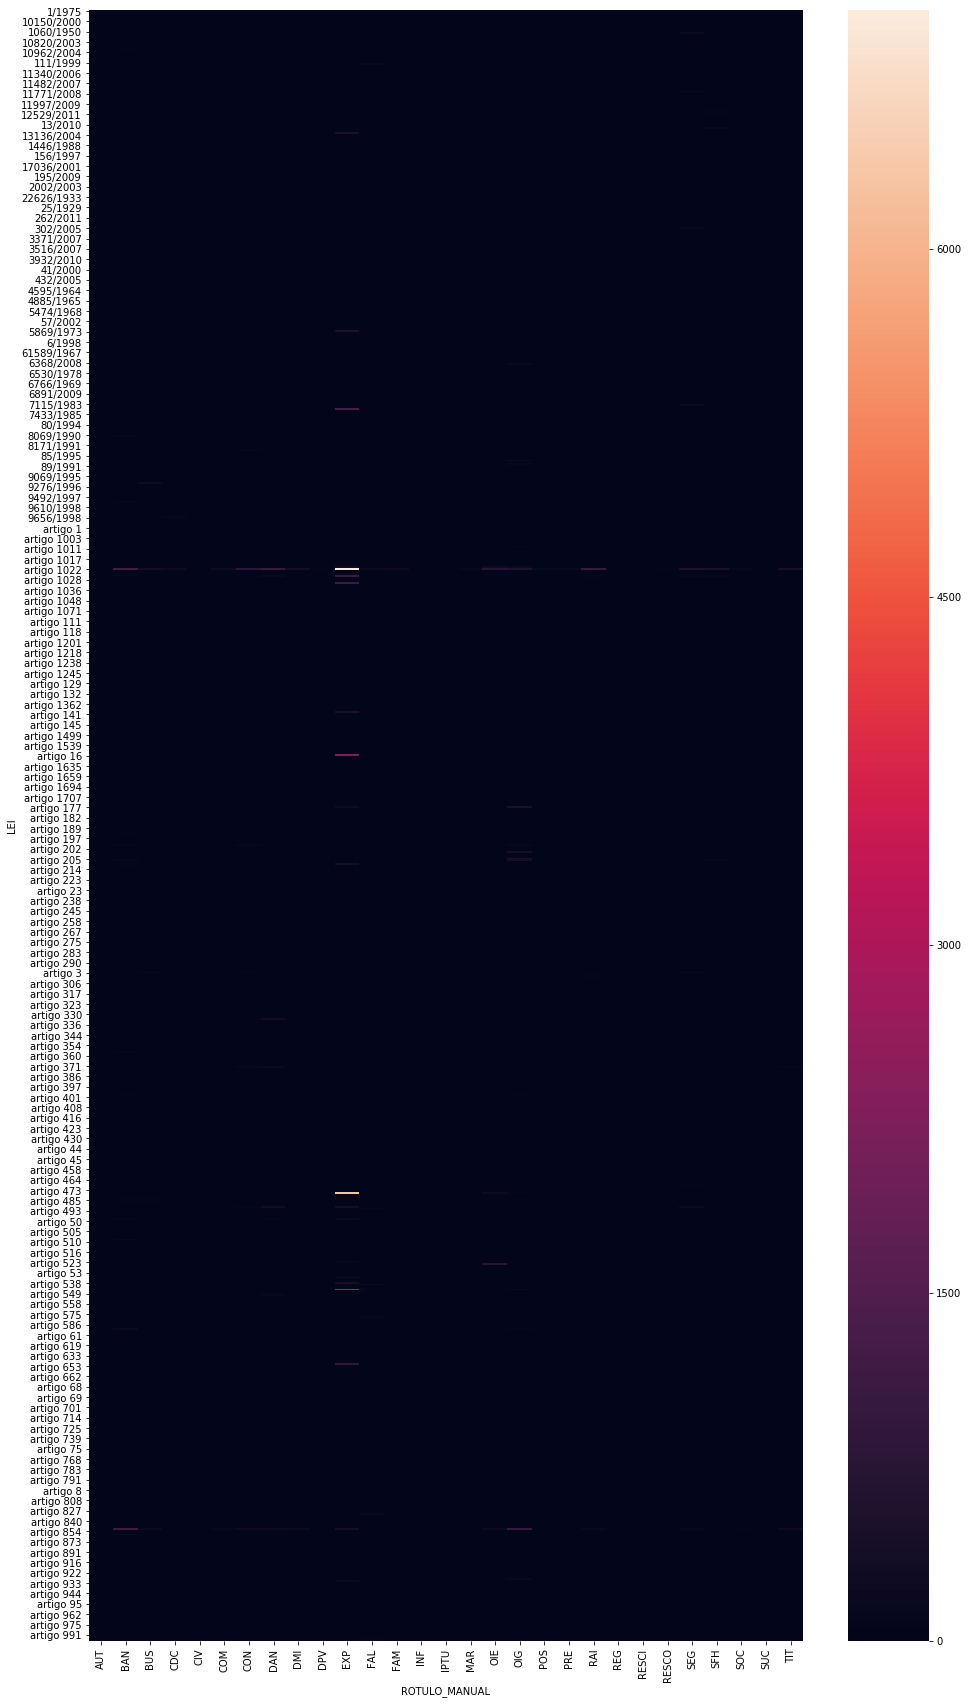

In [9]:
import seaborn as sns
from matplotlib import pyplot

pyplot.figure(figsize = (16,30))
ax = sns.heatmap(df_g)

In [10]:
df_csv = df.drop(['EMENTA'], axis=1)
df_csv.to_csv('../data/leis.csv')